# Part 3 - Filtering

----------
### Presentation covering basics of filters and filter kernels
----------

## Filtering images with PIL

In [1]:
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

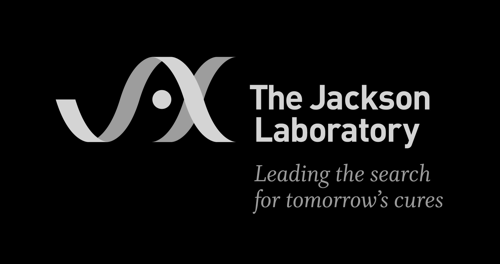

In [2]:
jax = Image.open('data/jax.jpeg')
jax_thumb = jax.copy()
jax.close

jax_thumb.thumbnail([500,500])

jax_gray = ImageOps.invert(jax_thumb.convert('L')) #convert to inverted grayscale
jax_gray

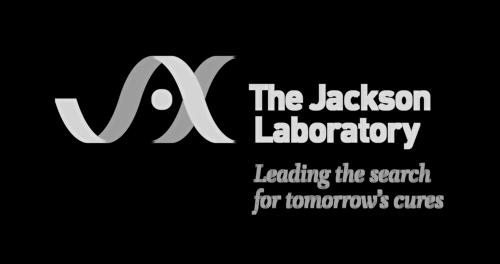

In [3]:
#This replaces each pixel with the max value in a n x n square surrounding the pixel (n must be odd!)
n = 3 #play with this value
jax_gray.filter(ImageFilter.MaxFilter(n))

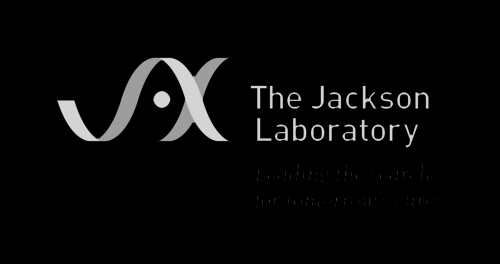

In [4]:
n = 3 #play with this value
jax_gray.filter(ImageFilter.MinFilter(n))

In [5]:
# Look at the pixel values around the 'L' in Laboratory
np.array(jax_gray.crop([253,130,265,145]))

array([[  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 209,  39,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 213, 208,  32,   0,   0,   0],
       [  0,   0,   0, 140, 219, 212, 212, 210, 140, 124, 124, 124],
       [  0,   0,   0, 140, 219, 212, 212, 212, 219, 220, 220, 220],
       [  0,   0,   0, 140, 219, 212, 212, 212, 212, 212, 212, 212],
       [  0,   0,   0, 144, 224, 219, 219, 219, 219, 219, 219, 219],
       [  0,   0,   0, 100, 156, 150, 150, 150, 150, 150, 150, 150],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  

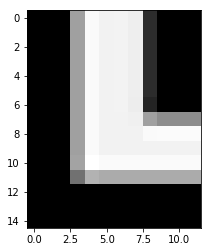

In [6]:
plt.imshow(np.array(jax_gray.crop([253,130,265,145])), cmap = 'gray');

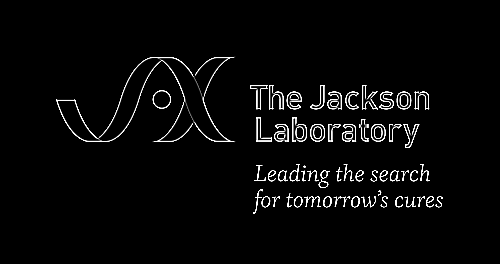

In [7]:
kernel = (-1,-1,-1,-1,8,-1,-1,-1,-1)
jax_edges = jax_gray.filter(ImageFilter.Kernel(size=(3,3), kernel=kernel, scale=1, offset=0))
jax_edges

In [8]:
# The 'L' is now hollow, because only the edges are marked
np.array(jax_edges.crop([253,130,265,145]))

array([[  0,   0,   0, 183, 255,   0,  15, 255,   0,   0,   0,   0],
       [  0,   0,   0, 183, 255,   0,  15, 255,   0,   0,   0,   0],
       [  0,   0,   0, 183, 255,   0,  15, 255,   0,   0,   0,   0],
       [  0,   0,   0, 183, 255,   0,  15, 255,   0,   0,   0,   0],
       [  0,   0,   0, 183, 255,   0,  15, 255,   0,   0,   0,   0],
       [  0,   0,   0, 183, 255,   0,  16, 255,   0,   0,   0,   0],
       [  0,   0,   0, 183, 255,   0,  16, 255,   0,   0,   0,   0],
       [  0,   0,   0, 183, 255,   0,   5, 232,   0,  37,  84,  84],
       [  0,   0,   0, 183, 255,   0,   2,  67, 210, 255, 255, 255],
       [  0,   0,   0, 174, 242,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 255, 255, 210, 228, 228, 228, 228, 228, 228],
       [  0,   0,   0, 255, 255, 232, 243, 243, 243, 243, 243, 243],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  

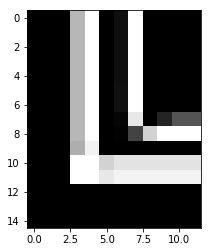

In [9]:
plt.imshow(np.array(jax_edges.crop([253,130,265,145])), cmap = 'gray');

## Filtering images with scikit-image

In [10]:
from skimage import io, color, util, filters, transform

In [11]:
jax2 = io.imread('data/jax.jpeg')
type(jax2)

numpy.ndarray

/anaconda3/envs/ImPyClass/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(264, 500, 3)

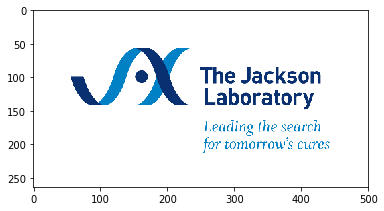

In [12]:
jax2 = transform.rescale(jax2, .258)
plt.imshow(jax2);
jax2.shape

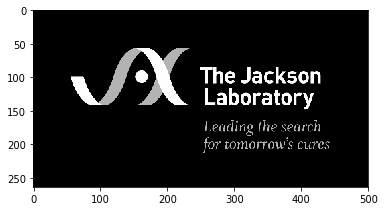

In [13]:
# scikit-image has many functions similar to PIL, they just work a little differently
jax2_gray = color.rgb2gray(jax2)
jax2_gray = util.invert(jax2_gray)
plt.imshow(jax2_gray, cmap='gray');

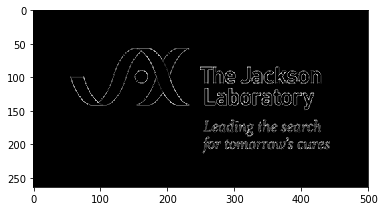

In [14]:
# The kernel we used above:

# -1 -1 -1
# -1  8 -1
# -1 -1 -1

# is actually a discrete approximation of the Laplacian
# We can apply a more exact Laplacian with scikit-image,
# but the data are output as signed floating point and need to be normalized

jax2_edges = filters.laplace(jax2_gray)

# These next two lines normalize the output to something viewable
jax2_edges = abs(jax2_edges*(255/jax2_edges.max()))
jax2_edges = jax2_edges.astype('uint8')

plt.imshow(jax2_edges, cmap='gray');

In [15]:
jax2_edges[130:145, 253:265]

array([[  0,   0,  75,  60,  14,   0,   0,  90,  90,   0,   0,   0],
       [  0,   0,  75,  60,  14,   0,   0,  90,  90,   0,   0,   0],
       [  0,   0,  75,  60,  14,   0,   0,  90,  90,   0,   0,   0],
       [  0,   0,  75,  60,  14,   0,   0,  90,  90,   0,   0,   0],
       [  0,   0,  75,  60,  14,   0,   0,  90,  90,   0,   0,   0],
       [  0,   0,  75,  60,  14,   0,   0,  90,  90,   0,   0,   0],
       [  0,   0,  75,  60,  14,   0,   0,  87, 162,  75,  75,  75],
       [  0,   0,  75,  60,  14,   0,   0,  14,  44,  60,  60,  60],
       [  0,   0,  75,  60,  14,   0,   0,   0,  15,  15,  15,  15],
       [  0,   0,  75,  60,  14,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  75,  67,  23,   9,   9,   9,   9,   9,   9,   9],
       [  0,   0,  67, 114,  85,  71,  71,  71,  71,  71,  71,  71],
       [  0,   0,   0,  67,  80,  80,  80,  80,  80,  80,  80,  80],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  

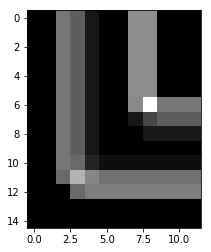

In [16]:
plt.imshow(jax2_edges[130:145, 253:265], cmap='gray');

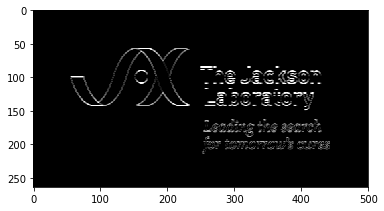

In [17]:
# scikit-image has a great set of filters
# prewitt-horizontal:
# 1  1  1
# 0  0  0
#-1 -1 -1

jax2_h_edges = filters.prewitt_h(jax2_gray)

#normalize
jax2_h_edges = abs(jax2_h_edges*(255/jax2_h_edges.max())) 
jax2_h_edges = jax2_h_edges.astype('uint8')

plt.imshow(jax2_h_edges, cmap='gray');

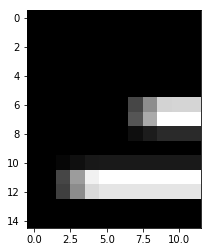

In [18]:
plt.imshow(jax2_h_edges[130:145, 253:265], cmap='gray');

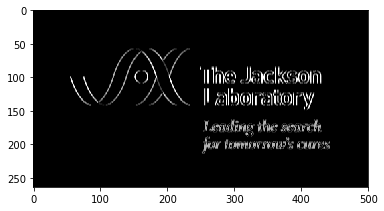

In [19]:
# prewitt-vertical:
# 1  0 -1
# 1  0 -1
# 1  0 -1

jax2_v_edges = filters.prewitt_v(jax2_gray)

#normalize
jax2_v_edges = abs(jax2_v_edges*(255/jax2_v_edges.max())) 
jax2_v_edges = jax2_v_edges.astype('uint8')

plt.imshow(jax2_v_edges, cmap='gray');

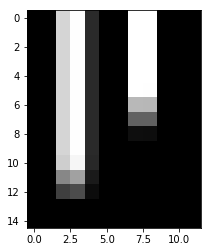

In [20]:
plt.imshow(jax2_v_edges[130:145, 253:265], cmap='gray');

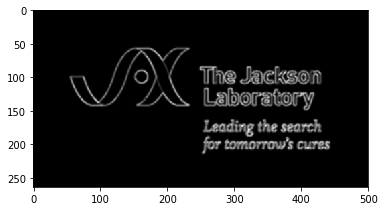

In [21]:
# Sometimes it is useful to apply a blur to noisy images

sigma=1 #play with this parameter
jax2_blur = filters.gaussian(jax2_edges, sigma=sigma)
plt.imshow(jax2_blur, cmap='gray');

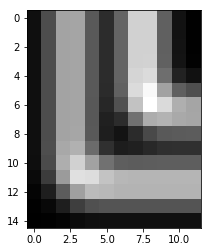

In [22]:
plt.imshow(jax2_blur[130:145, 253:265], cmap='gray');

In [23]:
from skimage import data
image = data.astronaut()

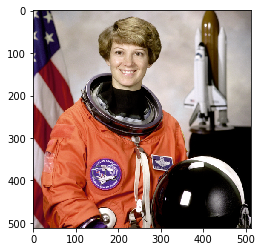

In [25]:
plt.imshow(image);

## Exercise

1. Convert the astronaut image to grayscale and highlight edges in the picture.
2. Thicken the edges to make them stand out better.

### Tips for this exercise
* Remember to normalize data output from your filter if you use scikit-image
* this is the scikit-image equivalent of PIL's ImageFilter.MaxFilter():
```
from skimage import morphology
n = <size of max filter window>
thick_edges = morphology.dilation(edges, selem=np.ones([n,n]))
```
* This converts a floating point numpy.ndarray image to a PIL Image:
```
pil_image = Image.fromarray((image * 255).astype('uint8'))
```

In [36]:
from skimage import morphology

In [26]:
image = color.rgb2gray(image)

dtype('float64')

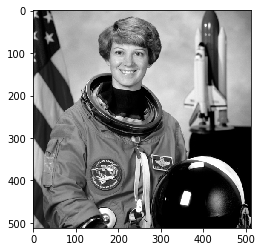

In [43]:
plt.imshow(image, cmap='gray');

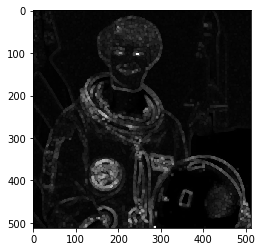

In [56]:
edges = filters.laplace(image)

edges = abs(edges*(255/edges.max())) 
edges = edges.astype('uint8')

thick_edges = morphology.dilation(edges, selem=np.ones([5,5]))

plt.imshow(thick_edges, cmap='gray')

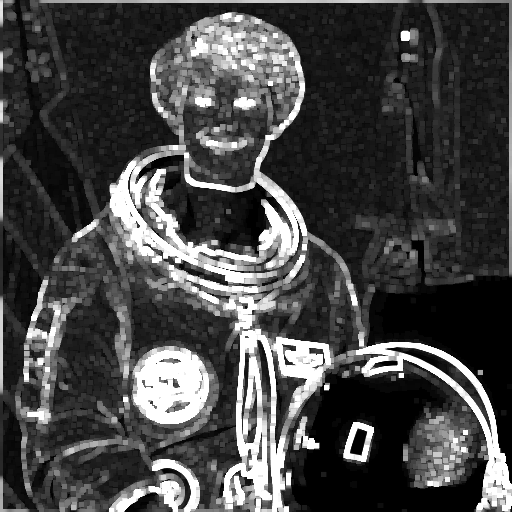

In [54]:
pil_image = Image.fromarray((image * 255).astype('uint8'))

kernel = (-1,-1,-1,-1,8,-1,-1,-1,-1)
pil_edges = pil_image.filter(ImageFilter.Kernel(size=(3,3), kernel=kernel, scale=1, offset=0))
pil_edges.filter(ImageFilter.MaxFilter(5))